# Aufgabe für das Bewerbungsgespräch
1. Importiere die mitgelieferte CSV-Datei in ein Pandas DataFrame, wobei du den Spaltennamen B in „Energiequelle“, den Spaltennamen C in „Leistung in kW“ umbenennst und die Spalte A löschst. In der CSV-Datei entspricht jeder Eintrag einer Erzeugungsanlage.

_Wir nutzen die read_csv Funktion von pandas um diese Aufgabe direkt zu Lösen:_ 
- Zuerst definierent wir den Pfad um die CSV-Datein einzulesen
- Wir definieren ";" als separator damit die Datei richtig eingelesen wird
- Wir filtern die erste Spalte raus mit "usecols" und benennen die Spalten die wir nutzen mit "names"
- Wir definieren "header = 0" damit die ehemaligen Spaltennamen nicht auftreten"

In [303]:
import pandas as pd

names = ["Energiequelle", "Leistung in kW"]
data = pd.read_csv("data/2024-02-22 Data Bewerbungsaufgabe.csv", sep = ";", usecols = [1,2], names = names, header = 0)

print(data)

     Energiequelle Leistung in kW
0             wind            850
1             wind            850
2             wind            850
3             wind            850
4             wind            850
...            ...            ...
5102          wind           1.65
5103          wind            850
5104          wind           1.65
5105          wind            850
5106          wind            850

[5107 rows x 2 columns]


2. Sortiere das DataFrame nach den jeweiligen Energiequellen.

_Hier wird das DataFrame sortiert mit der pandas Funktion "sort_values"_

In [304]:
data = data.sort_values('Energiequelle')
print(data)

     Energiequelle Leistung in kW
4652        biogas            yes
3022        biogas            NaN
3021        biogas            NaN
3020        biogas            NaN
3018        biogas            NaN
...            ...            ...
2994           NaN            NaN
2995           NaN            NaN
3334           NaN            NaN
3529           NaN            NaN
4549           NaN            NaN

[5107 rows x 2 columns]


3. Definiere die Leistung der Einträge, in denen ein „Yes“ eingetragen ist, zu 600 kW.

In [305]:
data = data.replace(to_replace = 'yes', value = 600)

print(data)

     Energiequelle Leistung in kW
4652        biogas            600
3022        biogas            NaN
3021        biogas            NaN
3020        biogas            NaN
3018        biogas            NaN
...            ...            ...
2994           NaN            NaN
2995           NaN            NaN
3334           NaN            NaN
3529           NaN            NaN
4549           NaN            NaN

[5107 rows x 2 columns]


4. Lösche die Einträge, in denen keine Leistung angegeben ist oder etwas Anderes steht.

_Hier werden in der ersten Zeile werden alle Werte in "Leistung in kW" zu Zahlen umgewandelt. Datentypen die keine Zahlen sind werden mit "errors = 'coerce'" in NaN-Einträge verwandelt._
_Diese können dann mit "dropna()" zusammen mit den vorigen NaN-Einträgen aus dem DataFrame genommen_

In [306]:
#test
#data['Energiequelle'] = pd.to_numeric(data.iloc[:,0], errors = 'coerce')
#print(data)

data['Leistung in kW'] = pd.to_numeric(data.iloc[:,1], errors = 'coerce')
data = data.dropna()
print(data)



     Energiequelle  Leistung in kW
4652        biogas           600.0
2432        biogas           250.0
2427        biogas           901.0
2424        biogas           889.0
2407        biogas           330.0
...            ...             ...
1915          wind          3200.0
1914          wind          3200.0
1912          wind          3200.0
1913          wind          3200.0
5106          wind           850.0

[2762 rows x 2 columns]


5. Speichere die unterschiedlichen Energiequellen jeweils in ein eigenes DataFrame.

In [309]:
print(data['Energiequelle'].value_counts())

#wind_data = data.loc[data['Energiequelle'] == 'wind']
#solar_data = data.loc[data['Energiequelle'] == 'solar']
#biogas_data = data.loc[data['Energiequelle'] == 'biogas']
#gas_data = data.loc[data['Energiequelle'] == 'gas']
#biomass_data = data.loc[data['Energiequelle'] == 'biomass']
#hydro_data = data.loc[data['Energiequelle'] == 'hydro']
#waste_data = data.loc[data['Energiequelle'] == 'waste']
#coal_data = data.loc[data['Energiequelle'] == 'coal']
#oil_data = data.loc[data['Energiequelle'] == 'oil']
#nuclear_data = data.loc[data['Energiequelle'] == 'nuclear']

# alternative:

#test = data.loc[data['Energiequelle'] == data['Energiequelle'].value_counts().index[0]]
#print(test)

dt = { }

for x in range(len(data['Energiequelle'].value_counts())):
    dt[x] = data.loc[data['Energiequelle'] == data['Energiequelle'].value_counts().index[x]]
    
print (dt[0])

wind       2379
solar       297
biogas       25
gas          23
biomass      23
hydro         4
waste         4
coal          4
oil           2
nuclear       1
Name: Energiequelle, dtype: int64
     Energiequelle  Leistung in kW
2852          wind           600.0
2851          wind           600.0
2850          wind           600.0
2849          wind           600.0
2853          wind           600.0
...            ...             ...
1915          wind          3200.0
1914          wind          3200.0
1912          wind          3200.0
1913          wind          3200.0
5106          wind           850.0

[2379 rows x 2 columns]


6. Plotte die Leistung der Energiequelle „gas“ in Abhängigkeit von der Anzahl der Einträge als Graph (z.B. als Balkendiagramm) und speichere sie als jpg/png-Grafik.

     Energiequelle  Leistung in kW
1991           gas           600.0
2264           gas           600.0
2604           gas           600.0
3441           gas           440.0
3440           gas           440.0
3438           gas           440.0
1990           gas           600.0
1241           gas            10.0
1863           gas             2.0
1698           gas             2.0
4242           gas           420.0
1641           gas           600.0
1640           gas           600.0
797            gas             1.0
796            gas           600.0
795            gas           600.0
794            gas           600.0
1597           gas             2.0
1599           gas             2.0
1596           gas           800.0
2662           gas           600.0
3343           gas             2.0
2390           gas           600.0
Figure(432x288)


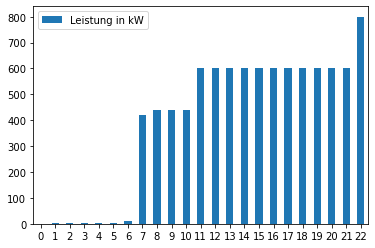

In [308]:
print(dt[3])

gas = dt[3].sort_values(by=['Leistung in kW']).reset_index(drop = True)
print(plot)

plot = gas.plot.bar(rot = 0).get_figure()
plot.savefig('data/gas_plot.png')